## Introduction

* The anchor-word algorithm is from [Practical Correlated Topic Modeling and Analysis via the Rectified Anchor Word Algorithm](https://moontae.people.uic.edu/papers/pdfs/Moontae_Lee-EMNLP2019.pdf). 

* I want to see how anchor-word algo works on a more realistically simulated dataset: I fit the  [sla dataset](https://zihao12.github.io/ebpmf_data_analysis/data_preprocessing_sla) with `fastTopics`. Then I use the fitted multinomial model to generate simulated data. I can change the document length to make the estimation problem easier or harder. 


## results

* Directly fitted on the simuated data: $\hat{F}$ is not bad, but $\hat{A}$ is bad: it completely ignores the topic correlations and marginal topic probabilities are also very wrong. Why? The anchor rows $S_0$ are estimated very wrongly (pick some of the background rows, due to estimation error in $C$ for less frequent words, I think).

* Using true $C$, we can get almost perfect result (not printed out here)

* Given true anchor rows $S0$, the estimates are pretty improved a lot. 

In [1]:
import os
import sys
import pandas as pd
from scipy import sparse
import pickle

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread
script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions_anchor import *
from misc import *


np.random.seed(123)

## sla-k6-rate1

matched topic idx
[2 1 0 3 4 5]
########## Compare A ############
### A ###
[[0.11 0.01 0.02 0.02 0.02 0.01]
 [0.01 0.08 0.02 0.01 0.01 0.01]
 [0.02 0.02 0.14 0.02 0.02 0.02]
 [0.02 0.01 0.02 0.12 0.01 0.01]
 [0.02 0.01 0.02 0.01 0.08 0.01]
 [0.01 0.01 0.02 0.01 0.01 0.07]]
[0.19 0.14 0.23 0.18 0.14 0.11]
### Afit ###
[[0.21 0.   0.   0.   0.   0.  ]
 [0.   0.1  0.   0.   0.   0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.   0.   0.   0.08 0.   0.  ]
 [0.   0.   0.   0.   0.13 0.  ]
 [0.   0.   0.   0.   0.   0.1 ]]
[0.21 0.1  0.36 0.08 0.13 0.1 ]
########## anchor rows ############
B[S,:]
[[0.e+00 0.e+00 2.e-05 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00]
 [2.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 2.e-05]]
Ftrue[S,:]
[[4.0e-05 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 5.0e-05 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 3.0e

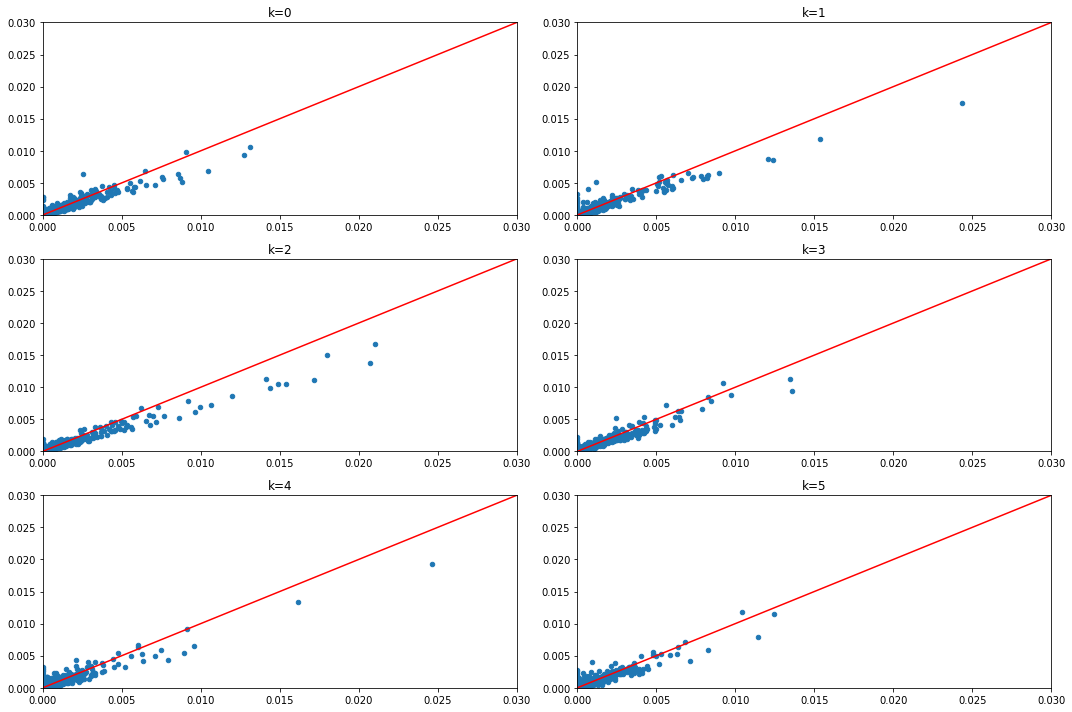

In [2]:
## load data
dataname = "sla"
k = 6
rate=1

datafile=f"output/fit_sim_{dataname}_fastTopics_k{k}_rate{rate}.pkl"
with open(datafile, "rb") as f:
    fitted = pickle.load(f)


idx = match_topics(fitted['Ftrue'],fitted['B']).astype(int)
print("matched topic idx")
print(idx)

print("########## Compare A ############")
print("### A ###")
print(fitted['Atrue'].round(2))
print(fitted['Atrue'].sum(axis = 0).round(2))
print("### Afit ###")
print(fitted['A'][np.ix_(idx, idx)].round(2))
print(fitted['A'][np.ix_(idx, idx)].sum(axis = 0).round(2))

print("########## anchor rows ############")
S = fitted["S"]
S0 = fitted["S0"]
print("B[S,:]")
print(fitted["B"][S[idx],:].round(5))
print("Ftrue[S,:]")
print(fitted["Ftrue"][S[idx],:].round(5))
print("Ftrue[S0,:]")
print(fitted["Ftrue"][S0,:].round(5))


print("########## Compare F ############")
n_row = int(k/2)

fig, axes = plt.subplots(n_row, 2, figsize = (15, 10))
custom_xlim = (0, 0.03)
custom_ylim = (0, 0.03)

# Setting the values for all axes.
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)
for i in range(n_row):
    j = 2*i
    axes[i, 0].scatter(fitted['Ftrue'][:, j], fitted['B'][:, idx[j]], s = 20)
    axes[i, 0].plot(custom_xlim, custom_ylim, 'k-', color = "red")
    axes[i, 0].set_title(f'k={j}')
    j += 1
    axes[i, 1].scatter(fitted['Ftrue'][:, j], fitted['B'][:, idx[j]], s = 20)
    axes[i, 1].plot(custom_xlim, custom_ylim, 'k-', color = "red")
    axes[i, 1].set_title(f'k={j}')

plt.tight_layout()
plt.show()

### Fitted with true $S_0$ 

[2 1 0 4 5 3]
### Atrue ###
[[0.11 0.01 0.02 0.02 0.02 0.01]
 [0.01 0.08 0.02 0.01 0.01 0.01]
 [0.02 0.02 0.14 0.02 0.02 0.02]
 [0.02 0.01 0.02 0.12 0.01 0.01]
 [0.02 0.01 0.02 0.01 0.08 0.01]
 [0.01 0.01 0.02 0.01 0.01 0.07]]
[0.19 0.14 0.23 0.18 0.14 0.11]
### A2 ###
[[0.088 0.015 0.033 0.019 0.023 0.009]
 [0.015 0.07  0.018 0.016 0.009 0.008]
 [0.033 0.018 0.149 0.001 0.026 0.016]
 [0.019 0.016 0.001 0.142 0.007 0.012]
 [0.023 0.009 0.026 0.007 0.065 0.007]
 [0.009 0.008 0.016 0.012 0.007 0.046]]
[0.187 0.136 0.243 0.198 0.136 0.098]
########## Compare F ############


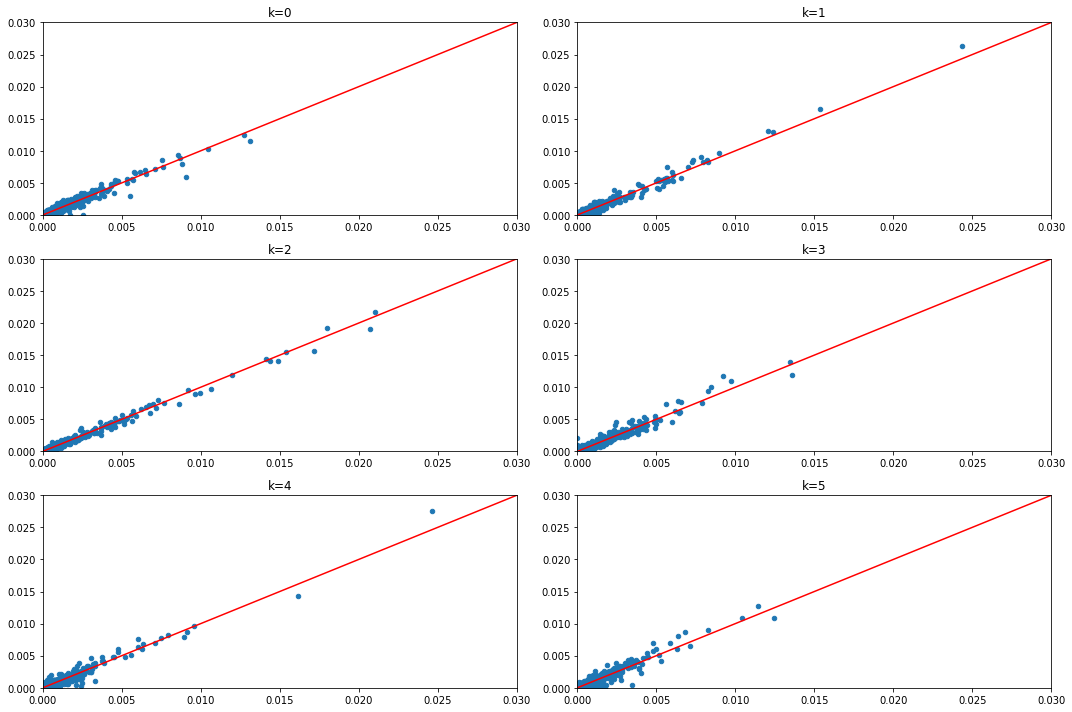

In [3]:
idx2 = match_topics(fitted["Ftrue"], fitted["B2"]).astype(int)
print(idx2)
print("### Atrue ###")
print(fitted['Atrue'].round(2))
print(fitted['Atrue'].sum(axis = 0).round(2))
print("### A2 ###")
print(fitted["A2"][np.ix_(idx2, idx2)].round(3))
print(fitted["A2"][np.ix_(idx2, idx2)].sum(axis = 0).round(3))

print("########## Compare F ############")
n_row = int(k/2)

fig, axes = plt.subplots(n_row, 2, figsize = (15, 10))
custom_xlim = (0, 0.03)
custom_ylim = (0, 0.03)

# Setting the values for all axes.
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)
for i in range(n_row):
    j = 2*i
    axes[i, 0].scatter(fitted['Ftrue'][:, j], fitted['B2'][:, idx2[j]], s = 20)
    axes[i, 0].plot(custom_xlim, custom_ylim, 'k-', color = "red")
    axes[i, 0].set_title(f'k={j}')
    j += 1
    axes[i, 1].scatter(fitted['Ftrue'][:, j], fitted['B2'][:, idx2[j]], s = 20)
    axes[i, 1].plot(custom_xlim, custom_ylim, 'k-', color = "red")
    axes[i, 1].set_title(f'k={j}')

plt.tight_layout()
plt.show()

### Look at $C$ vs $\hat{C}$ at anchor rows

/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


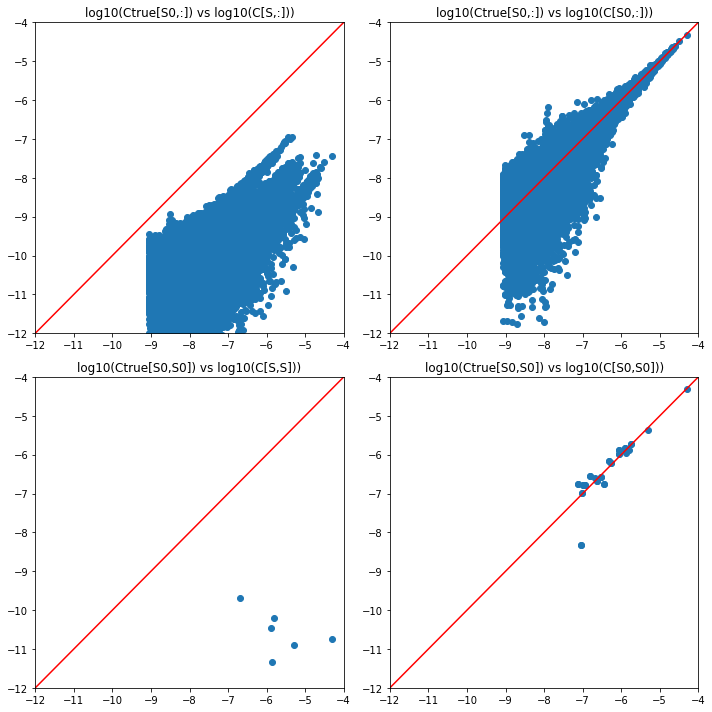

In [4]:
C = fitted['C']
Ctrue = fitted['Ftrue'] @ fitted['Ltrue'].T
Ctrue = Ctrue @ Ctrue.T
Ctrue /= Ctrue.sum()


fig, axes = plt.subplots(2, 2, figsize = (10, 10))
custom_xlim = (-12, -4)
custom_ylim = (-12, -4)

# Setting the values for all axes.
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

axes[0, 0].scatter(np.log10(Ctrue[S0[idx2],:]), np.log10(C[S[idx],:]))
axes[0, 0].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[0, 0].set_title('log10(Ctrue[S0,:]) vs log10(C[S,:]))')

axes[0, 1].scatter(np.log10(Ctrue[S0[idx2],:]), np.log10(C[S0[idx2],:]))
axes[0, 1].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[0, 1].set_title(f'log10(Ctrue[S0,:]) vs log10(C[S0,:]))')

axes[1, 0].scatter(np.log10(Ctrue[np.ix_(S0[idx2], S0[idx2])]), np.log10(C[np.ix_(S[idx], S[idx])]))
axes[1, 0].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[1, 0].set_title(f'log10(Ctrue[S0,S0]) vs log10(C[S,S]))')


axes[1, 1].scatter(np.log10(Ctrue[np.ix_(S0, S0)]), np.log10(C[np.ix_(S0, S0)]))
axes[1, 1].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[1, 1].set_title(f'log10(Ctrue[S0,S0]) vs log10(C[S0,S0]))')


plt.tight_layout()
plt.show()

### Look at $C$ vs $\hat{C}$ at anchor rows after scaling 

/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


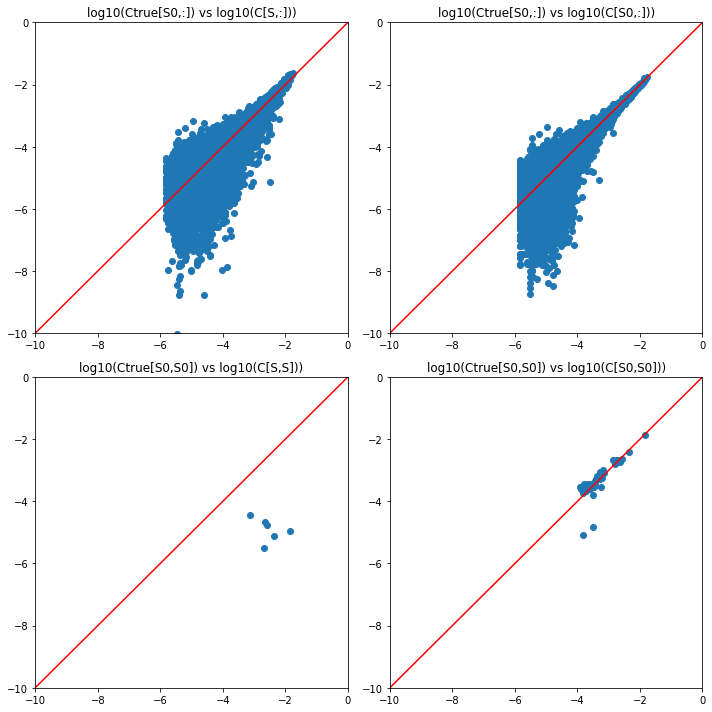

In [5]:
Ctrue = Ctrue/Ctrue.sum(axis = 1)[:, np.newaxis]
C = C/C.sum(axis = 1)[:, np.newaxis]

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
custom_xlim = (-10, 0)
custom_ylim = (-10, 0)

# Setting the values for all axes.
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

axes[0, 0].scatter(np.log10(Ctrue[S0[idx2],:]), np.log10(C[S[idx],:]))
axes[0, 0].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[0, 0].set_title('log10(Ctrue[S0,:]) vs log10(C[S,:]))')

axes[0, 1].scatter(np.log10(Ctrue[S0[idx2],:]), np.log10(C[S0[idx2],:]))
axes[0, 1].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[0, 1].set_title(f'log10(Ctrue[S0,:]) vs log10(C[S0,:]))')

axes[1, 0].scatter(np.log10(Ctrue[np.ix_(S0[idx2], S0[idx2])]), np.log10(C[np.ix_(S[idx], S[idx])]))
axes[1, 0].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[1, 0].set_title(f'log10(Ctrue[S0,S0]) vs log10(C[S,S]))')


axes[1, 1].scatter(np.log10(Ctrue[np.ix_(S0, S0)]), np.log10(C[np.ix_(S0, S0)]))
axes[1, 1].plot(custom_xlim, custom_ylim, 'k-', color = "red")
axes[1, 1].set_title(f'log10(Ctrue[S0,S0]) vs log10(C[S0,S0]))')


plt.tight_layout()
plt.show()